STA130 HW04
Nicholas Ramcharitar

ChatGPT Links:

https://chatgpt.com/share/66fa2419-b170-800c-ae74-f55976658e98

https://chatgpt.com/share/66fedf67-7d68-800c-a622-9497d98e878b

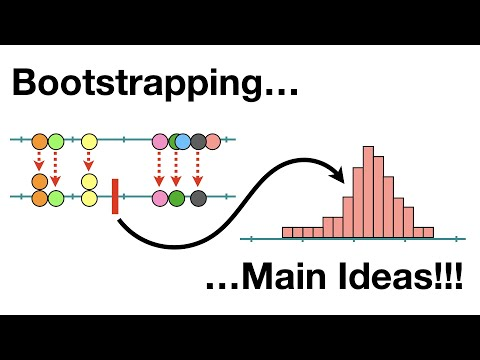

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)


Q1
The "Pre-lecture" video (above) mentioned the "standard error of the mean" 
as being the "standard deviation" of the distribution bootstrapped means. 

What is the difference between the "standard error of the mean" and the "standard deviation" 
of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.


The ST Dev ST Err is that St Dev calculates the mean distance to the mean in a sample  and ST Err is the mean distance from a histogram full of the bootstrapped means. This tells us the range in which a typical value in the set should be


Q2

 The "Pre-lecture" video (above) suggested that the "standard error of the mean" 
 could be used to create a confidence interval, but didn't describe exactly how to do this. 
 How can we use the "standard error of the mean" to create a 95% confidence interval which 
 "covers 95% of the bootstrapped sample means"? 
 Explain this concisely in your own words.
 
 To create a confidence interval of 95%, you would take Sample Mean(aka X bar) and +- the 2STD DEVS to get the 95% confidence interval, this is a commonly used approx that i believe can work for us


Q3
Creating the "sample mean plus and minus about 2 times the standard error" 
confidence interval addressed in the previous problem should indeed cover 
approximately 95% of the bootstrapped sample means. Alternatively, how do 
we create a 95% bootstrapped confidence interval using the bootstrapped means 
(without using their standard deviation to estimate the standard error of the mean)? 
Explain this concisely in your own words.

You would take the range of the bootstrapped means from the 2.5th percentile and the 97.5th percentile. This range covers
the middle 95% of the data so in a way  it might be slighlt more accurate than the method above, but not as easy



Q4
The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).




In [2]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
data = pd.read_csv(file_path)

# Drop rows with missing 'age' values for the analysis
age_data = data['age'].dropna()

# Number of bootstrap samples
n_bootstrap_samples = 1000

# Function to generate bootstrap samples and compute statistics (mean in this case)
def bootstrap_mean(data, n_samples):
    bootstrap_means = []
    for _ in range(n_samples):
        # Sample with replacement from the data
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        # Calculate the sample mean and store it
        bootstrap_means.append(np.mean(bootstrap_sample))
    return np.array(bootstrap_means)

# Generate bootstrap samples and compute means
bootstrap_means = bootstrap_mean(age_data, n_bootstrap_samples)

# Compute the 95% confidence interval (2.5th and 97.5th percentiles) for the mean
ci_lower, ci_upper = np.percentile(bootstrap_means, [2.5, 97.5])
ci_mean = (ci_lower, ci_upper)
print(f"95% CI for the population mean age: {ci_mean}")

# Function to generate bootstrap samples and compute statistics (median in this case)
def bootstrap_median(data, n_samples):
    bootstrap_medians = []
    for _ in range(n_samples):
        # Sample with replacement from the data
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        # Calculate the sample median and store it
        bootstrap_medians.append(np.median(bootstrap_sample))
    return np.array(bootstrap_medians)

# Generate bootstrap samples and compute medians
bootstrap_medians = bootstrap_median(age_data, n_bootstrap_samples)

# Compute the 95% confidence interval (2.5th and 97.5th percentiles) for the median
ci_lower_median, ci_upper_median = np.percentile(bootstrap_medians, [2.5, 97.5])
ci_median = (ci_lower_median, ci_upper_median)
print(f"95% CI for the population median age: {ci_median}")


95% CI for the population mean age: (28.671247899159667, 30.74675805322129)
95% CI for the population median age: (27.0, 29.0)



Q5

The previous question addresses making a confidence interval for a population 
parameter based on a sample statistic. Why do we need to distinguish between 
the role of the popualation parameter and the sample sample statistic when it
comes to confidence intervals? Explain this concisely in your own words.

   A confidence interval is a proposed range of values for the population parameter, we typically use 
middle 95. This is a range of the population that we would view as the most accurate way to represent the population
leaving the 2.5 near 100 and 0 out. The sample statictic is a fraction of data represented. Depending on how the population
is generated, it may rely on the sample statistic, like if you used bootstrapped samples of the mean to make a histogram that represents the population. 
    So in summary, the sample statistic is what researchers collect, a fraction of the population, used to make a normal 
distribution using bootstrapped means to make a histogram and the popualtion parameter is a range of values of the popualtion(i.e. conf int) to make an inference about the population. SO the SS is the one of the least accurate fraction of the population used to make a normal distribution and the PP is the most accruate way to infer about the data usually a CI




Q6

Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

What is the process of bootstrapping?

Boostrapping is when you have some data, take a certain number of random observations from that data(duplicates are ok)and then take the average of that. repeat this process until you are satisfied, then with those averages create a histogram.


What is the main purpose of bootstrapping?

To create a curve which represents the population of the sample data. The x axis represents the mean of the population and y axis represents the frequency of that mean occuring in the bootstrapping process

If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

If i had guessed the population to be some number k, I would use boostrapping to create a normal distribution curve and look what if the peak of the curve's x axis value is close to k.


Q7

The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". 
a) Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? 
b) Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

a) First of all the sample mean should not be held in a higher regard than the mean of the normal distribution. But the mere fact that 0 is in the 95% CI, says that it is not illogical to conculde that there is no effect. 

b) Choosing to reject the null hypothesis is a failure represent the fact that there is no effect. This is just misleading  the reader 

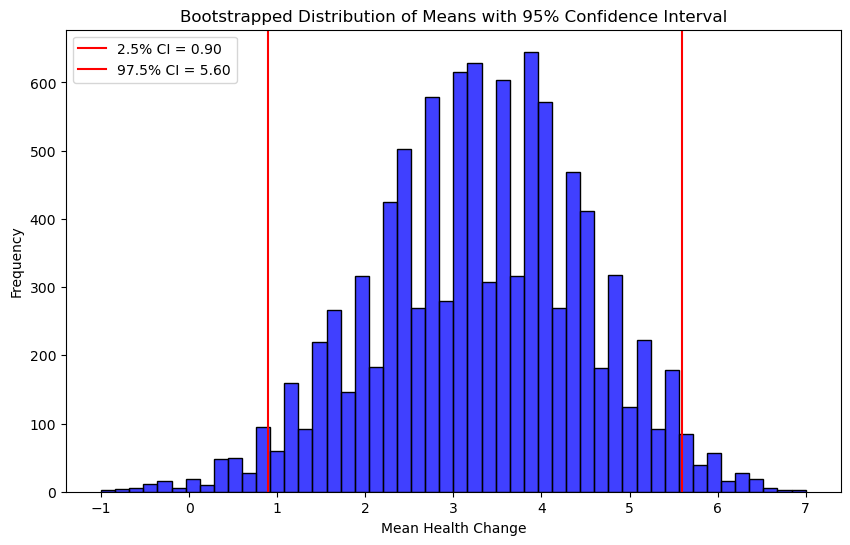

95% confidence interval: [0.9 5.6]


In [2]:
"""
Q8

Vaccine Data Analysis 
"""

# Importing all possible relevant libriaries
from scipy import stats
import numpy as np
import pandas as pd
import plotly.subplots as sp
import plotly.graph_objects as go
import random
import matplotlib.pyplot as plt
import seaborn as sns

# importing the df and creating a placeholder df2
url = "https://raw.githubusercontent.com/NicholasRamcharitar/Test-CSV-Holder/4b9bc5ff26e9dde89dbe5e7caead1353b55aa091/convertcsv.csv"
df = pd.read_csv(url)
df2 = pd.DataFrame()

# Calculate the health change, and use df2to hold the information on how the patient's health changed

df2['healthChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

df=df2



# Number of bootstrap samples
n_iterations = 10000

# Bootstrap sampling
boot_means = []
for _ in range(n_iterations):
    boot_sample = df.sample(n=len(df), replace=True)  # Sampling with replacement
    boot_mean = boot_sample['healthChange'].mean() # calculating the bootstrapped mean
    boot_means.append(boot_mean) # adding the mean to the array boot_means

# Convert to numpy array
boot_means = np.array(boot_means)

# getting the range of values for the middle 95% ()
conf_interval = np.percentile(boot_means, [2.5, 97.5]) 

# Plotting the distribution of bootstrapped means
plt.figure(figsize=(10, 6)) # Setting the size of the figure
sns.histplot(boot_means, bins=50, kde=False, color='blue') # a histogram
# Creating Lines for the Confidence Interval 
plt.axvline(conf_interval[0], color='red', linestyle='-', label=f'2.5% CI = {conf_interval[0]:.2f}')
plt.axvline(conf_interval[1], color='red', linestyle='-', label=f'97.5% CI = {conf_interval[1]:.2f}')
# Adding Titles and Labels 
plt.title('Bootstrapped Distribution of Means with 95% Confidence Interval')
plt.xlabel('Mean Health Change')
plt.ylabel('Frequency')
plt.legend()
plt.savefig("bootstrapped_means_distribution.png", format='png', dpi=300)
plt.show()

# Display the confidence interval
print(f"95% confidence interval: {conf_interval}")





Q8


Nicholas Ramcharitar

Vaccine Data Analysis:

Problem Overview: 

   The Problem is analyzing the Vaccine Data to determine whether to reject the "Null Hypothesis." Which is the Hypothesis of no effect, in this case if the Vaccine does anything or not. The way to do this is to see if the population mean range of a 95% confidence interval. To do this, we should create a normal distribution of bootstrapped means to visualize this with the CI highlighted.

Introduction:

   This Data Analysis is  intended to understand how much of an effect(if any at all) a vaccine has on its patients. The sample has 10 observations with columns: PatientID, Age, Gender, InitialHealthScore and FinalHealthScore. 
   
Methodology and Data Analysis:

   From this dataset, a new dataframe was created, with one column which was healthChange which was made up of FinalHealthScore - Initial Health Score. This is so that the the change of the health can be isolated as it's own value to then judge the effect of the vaccine. 
   
   This Dataset 'df2' was bootstrapped 10,000 times (with replacement) to create an array of bootstrapped means to then form the histogram "Bootstrapped Distribution of Means with a CI of 95%". This figure is a normal distrubution representing the population. This is supposed to be an accurate representation of all vaccine receiptients. Note that this figure was generated using the Python Libraries Seaborn, MatPlotLib and the datasets accessed using NumPy and Pandas.
   
   The figure also has a Confidence Interval(CI) of 95%, so that we can infer that any values in the interval are "likely to happen"/"normal." We can see that the CI is printed and that it is [0.9,5.6]. This implies that it is ok to assume that the vaccine will affect your health score by around 1 to 5 Points. This obviously implies that it is illogical to assume that the vaccine has 0 affect or affects people negativley.
  
Conclusion:

   Therefore we can conclude that the null hypothesis must be rejected in this case because 0 is not in the CI. We can conclude that in a normal circumstance, the vaccine would affect someone's health score by around 1-5 points. Therefore its is logical, to conclude from this analysis, that the vaccine works. 

In [6]:
"""
Q9
I used ChatGPT, my annotated lecture notes and the textbook notes
"""

'\nQ9\nI used ChatGPT, my annotated lecture notes and the textbook notes\n'